# Homework 9: Algorithm Design and Analysis



## 1 Implementing a Basic Data Structure

### 1.1 Class 'Trie'

In [17]:
class Trie:
    '''class for Trie'''
    
    def __init__(self):
        self.root = dict() ## Initialize an empty dictionary
        
    def add(self, s):
        e = self.root
        for c in s:
            if c not in e:
                e[c] = dict() ## If a particular letter is not a dictionary key, then add that key, whose value is an empty dictionary
            e = e[c] ## go to that dictionary
        e[''] = None ## for the dictionary, which is a value for the last letter of the word, add a key '' with value None 
    ## This signifies the parent dictionary to be a node
    
    
    def contains(self, s):
        e = self.root
        check_char = True
        check_node = True
        for c in s:  ## To ckeck all the letters in a word is in that dictionary, as in Trie representation
            if c not in e:
                check_char = False
                break
            else:
                e = e[c]  
        if check_char == True: ## Check if the dictionary corresponding to the last letter is a leaf
            check_node = '' in e
        return check_char and check_node
        
    
    def __repr__(self):
        return(str(self.root))
        
        

### 1.2 Function 'wordlist2trie'

In [18]:
def wordlist2trie(list_str):
    '''Included a list of string in a new Trie object; Return Trie object'''
    if type(list_str) is not list:
        raise TypeError("Input is not list")
    trie_word = Trie()
    for string in list_str:
        if type(string) is not str:
            raise ValueError("One of the entry is not string")
        trie_word.add(string)
    return trie_word

### 1.3 Word list in 'words.txt'

In [19]:
import re
fhand = open("words.txt")
word_list = []
for line in fhand:
    line_words = re.findall(r'\w+',line)
    for word in line_words:
        word_list.append(word)

In [20]:
big_trie = wordlist2trie(word_list)
#print(repr(big_trie))

Test with ['cat','dog','do','goat']

In [21]:
trie = wordlist2trie(['cat','dog','do','goat'])
print(repr(trie))

{'c': {'a': {'t': {'': None}}}, 'd': {'o': {'g': {'': None}, '': None}}, 'g': {'o': {'a': {'t': {'': None}}}}}




## Compairing Sorting Algorithms

### 2.1

#### Merge Sort

In [22]:
import math
def mergesort(m):
    try:
        m = list(m)
    except:
        raise TypeError("Input can't be converted into list")
    
    if len(m) < 2:
        return m
    
    else:
        i = math.floor(len(m)/2)
        left = mergesort(m[:i])
        right = mergesort(m[i:])
        
        return merge(left, right)
    
def merge(left, right):
    result = []
    while len(left)> 0 and len(right) > 0: 
        x = left[0]
        y = right[0]
        if x<y:
            result.append(x)
            left.remove(x)
        else:
            result.append(y)
            right.remove(y)
    if  len(left) == 0 and len(right) > 0:
        for s in right:
            result.append(s)
    elif  len(right) == 0 and len(left) > 0:
        for s in left:
            result.append(s)
    
    return result
        

#### Quick Sort

In [23]:
def QuickSort(m, low, high):
    if low < high:
        p = partition(m,low,high)
        m = QuickSort(m,low,p-1)
        m = QuickSort(m, p+1, high)
    return m

def partition(m, low, high):
    i = low-1
    pivot = m[high]
    
    for j in range(low, high):
        if m[j] <= pivot:
            i = i+1
            m[i], m[j] = m[j], m[i]
            
    m[i+1], m[high] = m[high], m[i+1]
    
    return i+1

def quicksort(m):
    try:
        m = list(m)
    except:
        raise TypeError("Input can't be converted into a list")
    return QuickSort(m,0,len(m)-1)

#### Bubble Sort

In [24]:
def bubblesort(m):
    try:
        m = list(m)
    except:
        raise TypeError("Input can't be converted into a list")
        
    n = len(m)
    swap = True
    while swap:
        swap = False
        for i in range(1,n):
            if m[i-1]>m[i]:
                m[i], m[i-1] = m[i-1], m[i]
                swap = True
        n = n - 1
    return m
        

### 2.2 

In [25]:
def run_timing_expt(m):
    ts = time.time()
    mergesort(m)
    t_merge = time.time() -ts
    
    ts = time.time()
    quicksort(m)
    t_quick = time.time() -ts
    
    ts = time.time()
    bubblesort(m)
    t_bubble = time.time() -ts
    
    return t_merge, t_quick, t_bubble

### 2.3

In [26]:
import numpy as np
import time
time_mean = []
time_std = []


n_list = [500, 1000, 1500, 2000, 2500]

for n in n_list:
    time_n = []
    for i in range(20):
        time_n.append(run_timing_expt(range(n)))
    time_n = np.array(time_n)
    time_mean.append(np.mean(time_n,axis = 0))
    time_std.append(np.std(time_n,axis = 0))
time_std = time_std/np.sqrt(20)

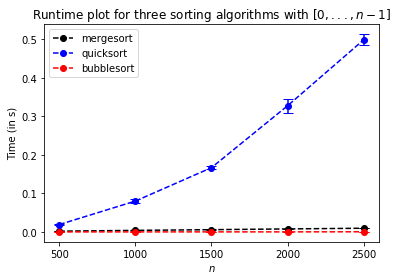

In [27]:
from matplotlib import pyplot as plt


p1 = plt.errorbar(n_list, [s[0] for s in time_mean], yerr = [2*s[0] for s in time_std], marker='o', mfc='black', capsize=5, capthick=1, ecolor='black', ls = '--', color = "black")
p2 = plt.errorbar(n_list, [s[1] for s in time_mean], yerr = [2*s[1] for s in time_std], marker='o', mfc='blue', capsize=5, capthick=1, ecolor='blue', ls = '--', color = "blue")
p3 = plt.errorbar(n_list, [s[2] for s in time_mean], yerr = [2*s[2] for s in time_std], marker='o', mfc='red', capsize=5, capthick=1, ecolor='red', ls = '--', color = "red")

plt.legend((p1[0],p2[0],p3[0]),('mergesort','quicksort','bubblesort'))

plt.ylabel('Time (in s)')
plt.xlabel('$n$')
plt.xticks(n_list, n_list)

plt.title('Runtime plot for three sorting algorithms with $[0,...,n-1]$')

plt.savefig('ascending.pdf')
plt.show()

If the array is already sorted, then calling quicksort on that array would result to determine the pivot at the very end of an array: a sorted array of length $n$ will be broken as two array of length $n-1$ and length $1$. Hence, the QuickSort function will be called $n$ times recursively. This causes to lead us to have recurrsion depth error. Consider a tree representation of the recurrsive call. When a system operates on a particular node of that tree, the system has to store all the function calls for the parent nodes. And for quicksort algorithm, if we have sorted array, we can have a node with depth $O(n).$ This blows up as $n$ increases. In ideal case, the depth is $O(\log n)$

### 2.4


The 2 standard error errorbar for mean obtained as $\bar X \mp 2\frac{s_X}{\sqrt{n}}.$ Here, $n = 20.$


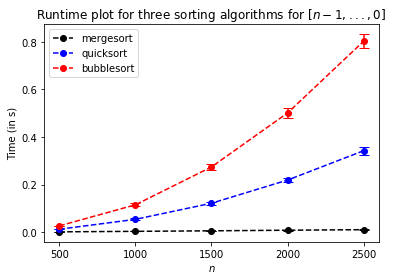

In [28]:
time_mean = []
time_std = []


n_list = [500, 1000, 1500, 2000, 2500]

for n in n_list:
    time_n = []
    m = sorted(list(range(n)),reverse=True)
    for i in range(20):
        time_n.append(run_timing_expt(m))
    time_n = np.array(time_n)
    time_mean.append(np.mean(time_n,axis = 0))
    time_std.append(np.std(time_n,axis = 0))
time_std = time_std/np.sqrt(20)
    
p1 = plt.errorbar(n_list, [s[0] for s in time_mean], yerr = [2*s[0] for s in time_std], marker='o', mfc='black', capsize=5, capthick=1, ecolor='black', ls = '--', color = 'black')
p2 = plt.errorbar(n_list, [s[1] for s in time_mean], yerr = [2*s[1] for s in time_std], marker='o', mfc='blue', capsize=5, capthick=1, ecolor='blue', ls = '--', color = 'blue')
p3 = plt.errorbar(n_list, [s[2] for s in time_mean], yerr = [2*s[2] for s in time_std], marker='o', mfc='red', capsize=5, capthick=1, ecolor='red', ls = '--', color = "red")

plt.legend((p1[0],p2[0],p3[0]),('mergesort','quicksort','bubblesort'))

plt.ylabel('Time (in s)')
plt.xlabel('$n$')
plt.xticks(n_list, n_list)

plt.title('Runtime plot for three sorting algorithms for $[n-1,...,0]$')

plt.savefig('descending.pdf')
plt.show()

### 2.5

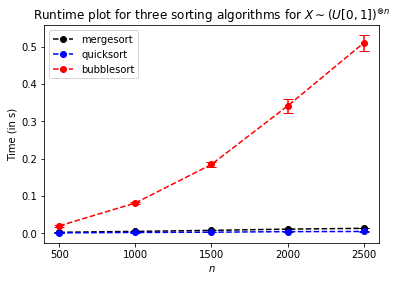

In [29]:
time_mean = []
time_std = []


n_list = [500, 1000, 1500, 2000, 2500]

for n in n_list:
    time_n = []
    m = [np.random.random() for _ in range(n)]
    for i in range(20):
        time_n.append(run_timing_expt(m))
    time_n = np.array(time_n)
    time_mean.append(np.mean(time_n,axis = 0))
    time_std.append(np.std(time_n,axis = 0))
time_std = time_std/np.sqrt(20)
    
p1 = plt.errorbar(n_list, [s[0] for s in time_mean], yerr = [2*s[0] for s in time_std], marker='o', mfc='black', capsize=5, capthick=1, ecolor='black', ls = '--', color = 'black')
p2 = plt.errorbar(n_list, [s[1] for s in time_mean], yerr = [2*s[1] for s in time_std], marker='o', mfc='blue', capsize=5, capthick=1, ecolor='blue', ls = '--', color = 'blue')
p3 = plt.errorbar(n_list, [s[2] for s in time_mean], yerr = [2*s[2] for s in time_std], marker='o', mfc='red', capsize=5, capthick=1, ecolor='red', ls = '--', color = 'red')

plt.legend((p1[0],p2[0],p3[0]),('mergesort','quicksort','bubblesort'))

plt.ylabel('Time (in s)')
plt.xlabel('$n$')
plt.xticks(n_list, n_list)

plt.title('Runtime plot for three sorting algorithms for $X\sim (U[0,1])^{\otimes n}$')

plt.savefig('random.pdf')
plt.show()

Only plotting mergesort and quicksort

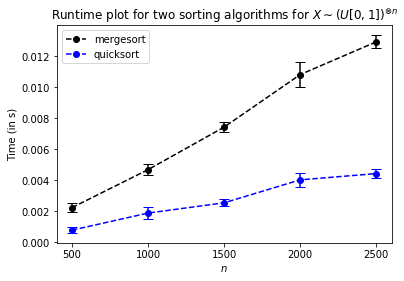

In [30]:
p1 = plt.errorbar(n_list, [s[0] for s in time_mean], yerr = [2*s[0] for s in time_std], marker='o', mfc='black', capsize=5, capthick=1, ecolor='black', ls = '--', color = 'black')
p2 = plt.errorbar(n_list, [s[1] for s in time_mean], yerr = [2*s[1] for s in time_std], marker='o', mfc='blue', capsize=5, capthick=1, ecolor='blue', ls = '--', color = 'blue')

plt.legend((p1[0],p2[0]),('mergesort','quicksort'))

plt.ylabel('Time (in s)')
plt.xlabel('$n$')
plt.xticks(n_list, n_list)

plt.title('Runtime plot for two sorting algorithms for $X\sim (U[0,1])^{\otimes n}$')
plt.show()